# Nonlinear Dynamics and Oscillations: 
Joseph C. Slater

Based on *Applied Nonlinear Dynamics: Analytical, Computational, and Experimental Methods* by Ali H. Nayfeh and Balakumar Balachandran

## Chapter 1: Introduction

- Dynamic system: State(s) evolve over time. 
- Discrete dynamic system: Algebraic equations (numerical integration)
- Continuous dynamic system: Time differential equations. 

- Steady state: state of system as $t\to \infty$
- State prior is a *transient state*
- Collection (functions) of these states are *transient solution*

- A solution can either be *constant* or *time varying*. 
  - Constant solutions are often called:
    - Fixed points
    - Equilibrium solutions
    - Stationary solutions
  - A time varying solution can also be called a *dynamic solution*

### Some definitions

 Symbol  name  |Definition
----------|----------
$\mathcal{R}^n$|$n$-dimensional Euclidean space
S|Angular space
$k$|Time index
$\mathcal{Z}$|set of all integers
$\subset$|subset
$\in$|in, or member of
$\to$|Maps to
$\cup$|Union
$(\mathbf{F}: M\to N)$|map $\mathbf{F}$ of points in region $M$ to region $N$
$D$|Domain of $(\mathbf{x},t)$ space
$S$|Space
$\mathcal{C}^0$| Continuous function (derivative is not continuous)
$\mathcal{C}^r$| $r$-time differentiable continuous function
$\mathbf{F}^k$|$k$th iteration of map $\mathbf{F}$



### Discrete-Time Systems

$$\mathbf{x}_{k+1}=\mathbf{F}(\mathbf{x}_k)$$

- $\mathbf{x}$ is a finite dimensional vector of dimension $n$
- Formally, $\mathbf{x} \in \mathcal{R}^n$
- Evolution in time may be in another space (spherical, cylindrical, toroidal) but locally it is always Cartesian
- $\mathbf{F}$ maps $\mathbf{x}_k$ to $\mathbf{x}_{k+1}$
- More formally, $\mathbf{F}$ maps points in a region $M$ to a region $N$ 
$$\mathbf{F}: M\to N$$
$$M\in \mathcal{R}^n$$
$$N\in \mathcal{R}^n$$
- The map $\mathbf{F}$ is said to map $M$ on to $N$ if for every point $\mathbf{y}\in N$ there exists *at least* one $\mathbf{x}\in M$ that maps to it.

- $\mathbf{F}$ is said to be *one-to-one* if no two points in $M$ map to the same point in $N$. (If we know where it is, we know where it came from)
- A one-to-one map is called *invertible*
$$\mathbf{x}_{k}=\mathbf{F}^{-1}(\mathbf{x}_{k+1})$$
- Not all maps are invertible. They are called *non-invertible*.

- When each component of $\mathbf{F}$ is $r$ times continuously differentiable with respect to $\mathbf{x}$, it is said to be a $\mathcal{C}^r$ function
- For $r\ge 1$ $\mathbf{F}$ is a *differentiable map*
- If both $\mathbf{F}$ and $\mathbf{F}^{-1}$ are continuous, $\mathbf{F}$ is called a *homeomorphism*
- If both $\mathbf{F}$ and $\mathbf{F}^{-1}$ are $\mathcal{C}^r$ where $r\ge 1$, $\mathbf{F}$ is a $\mathcal{C}^r$ *diffeomorphism* (map).

An orbit of a invertible map initiated at $\mathbf{x}=\mathbf{x_0}$ is made up of 
$$\{\ldots, \mathbf{F}^{-m}(\mathbf{x_0}), \ldots, \mathbf{F}^{-2}(\mathbf{x_0}), \mathbf{F}^{-1}(\mathbf{x_0}),  \mathbf{x_0}, \mathbf{F}(\mathbf{x_0}), \mathbf{F}^2(\mathbf{x_0}),\ldots, \mathbf{F}^m(\mathbf{x_0}), \dots
\}$$

where $m \in \mathcal{Z}^{+}$

If the map is noninvertible, the orbit is only
$$\mathbf{x_0}, \mathbf{F}(\mathbf{x_0}), \mathbf{F}^2(\mathbf{x_0}),\ldots, \mathbf{F}^m(\mathbf{x_0}), \dots
\}$$

- Succeccive applications of $\mathbf{F}$ are *forward iterates* or *forward iterations*
- $\mathbf{F}$ is sometimes called an *evolution operator*. 
- Sometimes we want to define control parameters (think settings of variables like mass, damping, etc.) and we can stat it explicitely as
$$\mathbf{x}_{k+1}=\mathbf{F}(\mathbf{x}_{k};\mathbf{M})$$

### Example 1.1: The *logistic map*

$$x_{k+1} = 4 \alpha x_k (1-x_k)$$
$$0\le x_k\le 1$$ and
$$0\le \alpha\le 1$$

In [1]:
%pylab inline
# The previous line is an IPython shortcut that imports a ton of functions.
# inline puts the plots inside the notebook (making these notes readable)
def logistic_map(x0 = 0.25, alpha = 0.5, nterms = 5):
    x = np.zeros(nterms)
    x[0] = x0
    for i in range(1, nterms):
        x[i] = 4 * alpha * x[i-1] * (1 - x[i-1])
    return x
x = logistic_map()
print(x)

Populating the interactive namespace from numpy and matplotlib
[ 0.25        0.375       0.46875     0.49804688  0.49999237]


### Example 1.2. The *Hénon map*
\begin{equation}
x_{x+1} = 1 + y_k -\alpha x_k^2
\end{equation}
\begin{equation}
y_{k+1} = \beta x_k
\end{equation}
Where $\alpha$ and $\beta$ are parameters.

When $\beta = 0$, $y_{k+1} = 0$, $x_{x+1} = 1 -\alpha x_k^2$ and is noninvertable.

When  $\beta \neq 0$
\begin{equation}
y_k = \frac{1}{\beta}y_{k+1}
\end{equation}
\begin{equation}
x_k = x_{x+1} - 1 + \frac{\alpha}{\beta^2}y_{k+1}^2
\end{equation}

$(x_k, y_k)$ and $(x_{k+1}, y_{k+1})$ uniquely determine each other. 

In Python we can code this up and see what happens. 

In [2]:
def solve_henon(alpha = 0.2, beta = 0.3, firstindex = 0, numsteps = 10, x0 = 1.0, y0 = 0.0):
    if firstindex > 0:
        firstindex = 0
    if -firstindex > numsteps:
        numsteps = -firstindex
    numsteps = numsteps + 1
    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1])
    x = np.zeros(numsteps)
    y = np.zeros(numsteps)
        
    x[-firstindex] = x0
    y[-firstindex] = y0

    def henon_F(x, y, alpha = alpha, beta = beta):
        return [1.0 + y - alpha * x**2, beta * x]
    
    def henon_F_inv(x, y, alpha = alpha, beta = beta):
        return [y / beta, x - 1 + (alpha / (beta**2)) * y**2]
    
    for i in range(-firstindex + 1, numsteps):
        x[i], y[i] = henon_F(x[i-1], y[i-1], alpha, beta)

    for i in range(-firstindex - 1, 0 - 1, -1):
        x[i], y[i] = henon_F_inv(x[i+1], y[i+1], alpha, beta)
  
    plt.plot(x,y,'*')
    
    for i in range(numsteps):
        #ax.annotate('%s' % i, xy=[x[i],y[i]], textcoords='offset points')
        ax.annotate('{}'.format(i + firstindex), xy=(x[i],y[i]), xytext=(3, -14), ha='right',textcoords='offset points')
    
    xrange = max(x) - min(x)
    yrange = max(y) - min(y)
    buf = 0.1
    ax.set_xlim((min(x) - buf * xrange, max(x) + buf * xrange))
    ax.set_ylim((min(y) - buf * yrange, max(y) + buf * yrange))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid()
    plt.show()

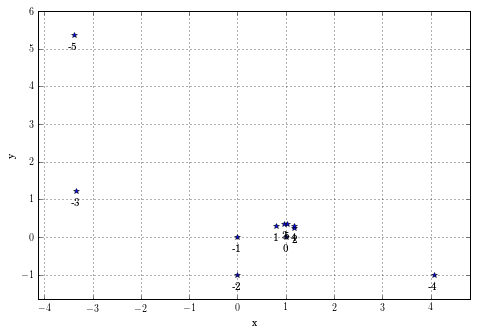

In [3]:
solve_henon(firstindex = -5, numsteps = 10)

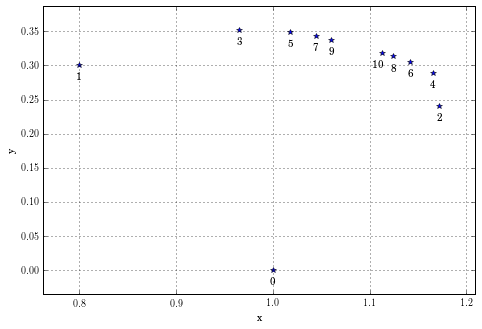

None

In [4]:
from ipywidgets.widgets.interaction import interact, interactive
# This is where I got the sliders.
w = interactive(solve_henon, alpha = (0.0,1.0), beta = (0.0,1.0), firstindex = (-10,0), numsteps = (5,100), x0 = (-10,10), y0 = (-10,10))
display(w)

# Continuous-Time Systems
## Nonautonomous Systems
$$\dot{\mathbf{x}}=\mathbf{F}(\mathbf{x},t)$$

$$x \in \mathcal{R}^n, t \in \mathcal{R}$$

- $F$ depends explicitely on $t$. 
- $\mathbf{x}$ is th state vector
- $\mathcal{R}^n$ is the state space within which $\mathbf{x}$ evolves
- $\mathcal{R}^n + \mathcal{R}^1$ is the extended state space (includes $t$)
- If $\mathbf{F}$ is linear, $\mathbf{x}$ is a linear vector field
- If $\mathbf{F}$ is nonlinear, $\mathbf{x}$ is a nonlinear vector field
- Graph of the solution in the extended space is the *integral curve*. 
- $\Gamma = \gamma(\mathbf{x}_0) = \gamma(\mathbf{x}_0)^-\cup\gamma^+(\mathbf{x}_0)$

### Example 1.3
$$\ddot{x}+2 \mu \dot{x} + \omega^2 x = F \cos(\Omega t)$$
Define (let)
$$\dot{x}_1= x_2$$
$$\dot{x}_2 = -2 \mu \dot{x} - \omega^2 x + F \cos(\Omega t)$$

We can solve for $\mu = 2$, $\omega^2 = 8$, $\Omega = 2$, $F = 10$. 
$$x_1=e^{-2 t}\left[a \cos(2 t)+ b \sin(2t)\right]+0.5 \cos(2t)+\sin(2t)$$
$$x_2 = -2 e^{-2t} \left[(a-b)\cos(2t)+(a+b)\sin(2t)\right] - \sin(2t)+2\cos(2t)$$

In [6]:
np.random.random((4, 3))

array([[ 0.9070486 ,  0.24480049,  0.44622765],
       [ 0.00836194,  0.32577542,  0.01826275],
       [ 0.57892688,  0.7001047 ,  0.51928648],
       [ 0.77912328,  0.18249102,  0.36687154]])

In [158]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation
def solve_sdof(max_time=10.0, omega = 2.8284, Omega = 2, mu = 2, F = 10, elevation = 30, angle = 10, x0 = 1, v0 = 0, plotnow = 1):

    
    def sdof_derive(x1_x2, t, omega = omega, Omega = Omega, mu = mu, F = F, angle = angle):
        """Compute the time-derivative of a SDOF system."""
        x1, x2 = x1_x2
        return [x2, -omega**2*x1-2*mu*x2+F*np.cos(Omega*t)]

    x0i=((x0, v0))
    # Solve for the trajectories
    t = np.linspace(0, max_time, int(250*max_time))
    x_t = sp.integrate.odeint(sdof_derive, x0i, t)
    
    x, v = x_t.T

    if plotnow == 1:
        fig = plt.figure()
        ax = fig.add_axes([0, 0, 1, 1], projection='3d')
        plt.plot(x, v, t,'--')
        plt.xlabel('x')
        plt.ylabel('v')
        ax.set_zlabel('t')

        ax.view_init(elevation, angle)
        plt.show()

    return t, x, v

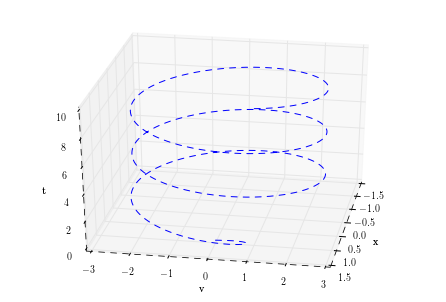

(array([  0.00000000e+00,   4.00160064e-03,   8.00320128e-03, ...,
          9.99199680e+00,   9.99599840e+00,   1.00000000e+01]),
 array([ 1.        ,  1.00004777,  1.0001901 , ...,  1.13287077,
         1.13706256,  1.14118152]),
 array([ 0.        ,  0.02381781,  0.04725334, ...,  1.0566054 ,
         1.03843857,  1.02020522]))

In [159]:
w = interactive(solve_sdof, max_time=(0,30.0), omega = (1, 10), mu =(0,2), elevation = (-90, 90), angle = (0,360));
display(w)

Phase diagram

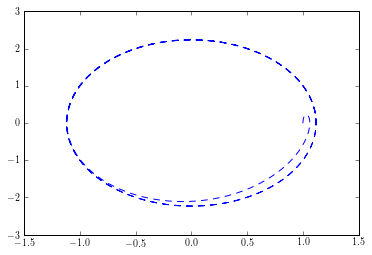

In [67]:
plt.plot(x,v)

Positive orbit of $x$

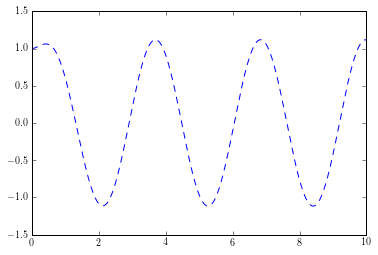

In [68]:
plt.plot(t, x)

Positive Orbit of $v$

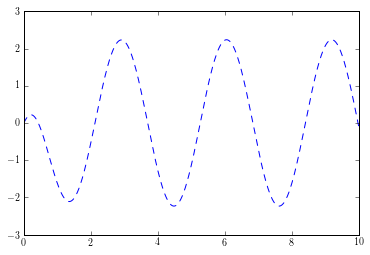

In [69]:
plt.plot(t, v)

- If components of $\mathbf{F}(\mathbf{x},t;\mathbf{M})$ are $\mathcal{C}^0$ in $D$, then $\mathbf{x}(t,\mathbf{x}_0,t_0)$ 
exists in a small interval around $\mathbf{x}_0$. 

- If components of $\mathbf{F}$ are $\mathcal{C}^1$ in $D$, then $\mathbf{x}(t,\mathbf{x}_0,t_0)$ 
*is unique* in a small interval around $\mathbf{x}_0$. 

- If existence and uniqueness of a solution are ensured, then the system is *deterministic*.

- If components of $\mathbf{F}$ are $\mathcal{C}^r$ functions of $\mathbf{x}$ and $\mathbf{M}$  then the solution is also $\mathcal{C}^r$ function of $t$, $t_0$, $\mathbf{x}$ and $\mathbf{M}$ around $\mathbf{x}_0$ ($t_0$).

### Example 1.4
Consider the previous example starting from different initial conditions:

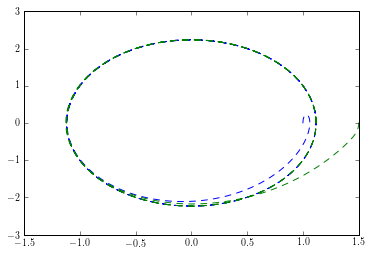

In [80]:
t, x1, v1 = solve_sdof(plotnow = 0)
t, x2, v2 = solve_sdof(plotnow = 0, x0 = 1.5)
ax = plt.plot(x1,v1,x2,v2)

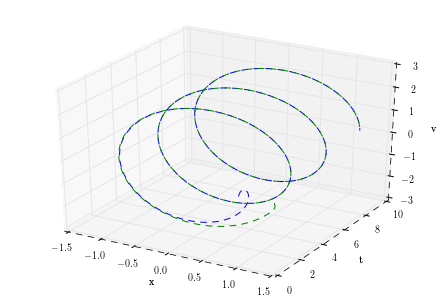

In [153]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1], projection='3d')
plt.plot(x1,t,v1)#,
plt.plot(x2,t,v2)
plt.xlabel('x')
plt.ylabel('t')
ax.set_zlabel('v')

#ax.view_init(140,145)

Note that the responses of the system converge to the same solution. 

## Autonomous systems
$$\mathbf{F}(\mathbf{x};\mathbf{M})$$

- *Not* explicitely a function of time.
- *Time invariant*, *time independent*, or *stationary*. 
    - The **model** is stationary, not the response!

In [248]:
def solve_sdof_n(max_time=10.0, omega = 2.8284, mu = 2.828, x0 = np.array([[1,1,-1,-1]]).T, v0 = np.array([[1,-1,1,-1]]).T, plotnow = 1):

    
    def sdof_deriv(x1_x2, t, omega = omega, mu = mu):
        """Compute the time-derivative of a SDOF system."""
        x1, x2 = x1_x2
        return [x2, -omega**2*x1-2*mu*x2]

    x0 = np.concatenate((x0, v0), axis = 1)
    N = x0.shape[0]
    # Solve for the trajectories
    t = np.linspace(0, max_time, int(250*max_time))
    x_t = np.asarray([sp.integrate.odeint(sdof_deriv, x0i, t)
                      for x0i in x0])


    if plotnow == 1:
        colors = plt.cm.jet(np.linspace(0, 1, N))
        fig = plt.figure()
        for i in range(N):
            x, v = x_t[i,:,:].T
            
            plt.plot(x, v)
        plt.grid()
            
    return t, x_t

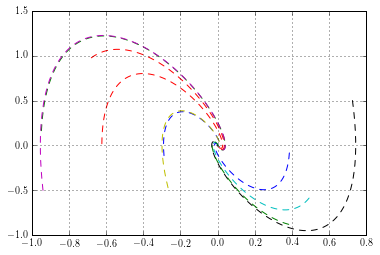

In [249]:
x0 = np.random.random((10,1))*2-1
v0 = np.random.random((10,1))*2-1
_, _ = solve_sdof_n(x0 = x0, v0 = v0, mu = 2)

Nonautonomous systems can be converted to autonomous systems by writing an additional equation. 
$$\dot{x}_1= x_2$$
$$\dot{x}_2 = -2 \mu \dot{x} - \omega^2 x + F \cos(\Omega t)$$

becomes
$$\dot{x}_1= x_2$$
$$\dot{x}_2 = -2 \mu \dot{x} - \omega^2 x + F \cos(\theta)$$
$$\dot{\theta} = \Omega$$
where $\theta = \Omega t$.

## Phase Portraits and Flows
- A *phase portrait* is a collection of trajectories (solutions) of the equations. 
- Illustrate coallescense, or absense, of solutions. 

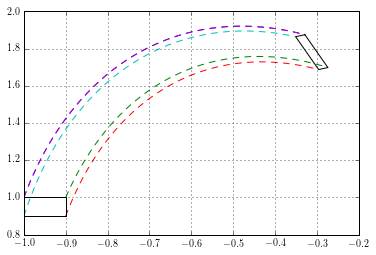

In [285]:
x0 = np.array([[-1, -.9 , -0.9, -1, -1]]).T
v0 = np.array([[1, 1, .9, 0.9, 1]]).T
t, x_t = solve_sdof_n(x0 = x0, v0 = v0, mu = 1, max_time=0.4)
plt.plot(x_t[:,0,0],x_t[:,0,1],'k-')
plt.plot(x_t[:,len(t)-1,0],x_t[:,len(t)-1,1],'k-')

## Attracting sets
- Note the prior system. 
    - If $\mu > 0$, the corresponding area swept decreases over time. This is called *dissipation*. 
    - If $\mu = 0$, the area is conserved. The flow *conserves* area.
    - If $\mu < 0$, we have expansion. 

Let's take a page from  Fluid Dynamics

Consider a small area (smaller than our starting area) $\Delta S$. The associated change in volume over time is 
$$\mathbf{v} \Delta t \cdot \mathbf{n} \Delta S$$
where $\mathbf{v} = \mathbf{\dot{x}} = \mathbf{F}$. $n$ is the outward normal vector of $S$. 

The total change in volume is

$$\Delta V = \Delta t \int \int_S \mathbf{F} \cdot \mathbf{n} dS$$

From the divergence theorem

$$\int\int_S \mathbf{F} \cdot \mathbf{n} dS = \int\int\int_V(\nabla\cdot\mathbf{F})dV$$



For an infinitessimally small $V$, the right hand side is simply $(\nabla\cdot\mathbf{F})V$. Therefore:
$$\frac{1}{V}\frac{\Delta V}{\Delta t} = \nabla\cdot\mathbf{F}$$
So, a flow is dissipative/conservative/expanding based on the divergence of the vector field. 

For a conservative system:
$$\sum_{i=1}^n \frac{\partial F_i(\mathbf{x})}{\partial x_i}=0$$
For a dissipative system
$$\sum_{i=1}^n \frac{\partial F_i(\mathbf{x})}{\partial x_i}<0$$

In mechanics we often encounter *Hamiltonian Systems* which are governed by
$$\dot{q}_i=\frac{\partial H}{\partial p_i}$$
$$\dot{p}_i = - \frac{\partial H}{\partial q_i}$$
Where $H$ is the *Hamiltonian*. The divergence of the vector field for such systems is.
$$\nabla \cdot \mathbf{F} = \sum_{i=1}^n\left[\frac{\partial}{\partial q_i}\left(\frac{\partial H}{\partial p_i}\right)+ \frac{\partial}{\partial p_i}\left(-\frac{\partial H}{\partial q_i}\right) \right]=0$$

This is why Hamilton's principle works for conservative systems. Preservation of flow (volumes) in Hamiltonian systems is called the *Liouville theorem*.

- *Attracting sets*: dissipating systems draw trajectories from varied initial conditions to a subspace of the state space.

- *Invariant set*: A set $\mathbf{P} \subset \mathcal{R}^n$ is invariant if for any initial condition $\mathbf{x}(t=t_0)\in\mathbf{P}$ we have $\mathbf{x}(t)\in\mathbf{P}$. 

### Example 1.7 
Back to our favorite system:
$$\dot{x}_1= x_2$$
$$\dot{x}_2 = -2 \mu \dot{x} - \omega^2 x$$

$$\frac{\partial F_1}{\partial x_1}\cdot n_{x_1}+ \frac{\partial F_2}{\partial x_2}\cdot n_{x_2}= 0+ - 2 \mu = -2 \mu$$
So, if $\mu>0$, the system is dissipative (locally). 


### Example 1.8 
Back to our favorite system:
$$\dot{x}_1= x_2$$
$$\dot{x}_2 = -2 \mu \dot{x} - \omega^2 x- F \cos(\theta)$$
$$\dot{theta} = \Omega$$

$$\frac{\partial F_1}{\partial x_1}\cdot n_{x_1}+ \frac{\partial F_2}{\partial x_2}\cdot n_{x_2}+\frac{\partial F_3}{\partial \theta}\cdot n_{x_2}= 0+ - 2 \mu + 0= -2 \mu$$
So, if $\mu>0$, the system is dissipative (locally) (still). 


In [303]:
def solve_forced_sdof_n(max_time=10.0, omega = 2.8284, mu = 2., x0 = np.array([[-1, -.9 , -0.9, -1, -1]]).T, v0 = np.array([[1, 1, .9, 0.9, 1]]).T, Omega = 5., F = 10, plotnow = 1):

    
    def sdof_deriv(x1_x2, t, omega = omega, mu = mu, Omega = Omega):
        """Compute the time-derivative of a SDOF system."""
        x1, x2 = x1_x2
        return [x2, -omega**2*x1-2*mu*x2 + F * np.cos(Omega * t)]

    x0 = np.concatenate((x0, v0), axis = 1)
    N = x0.shape[0]
    # Solve for the trajectories
    t = np.linspace(0, max_time, int(250*max_time))
    x_t = np.asarray([sp.integrate.odeint(sdof_deriv, x0i, t)
                      for x0i in x0])


    if plotnow == 1:
        colors = plt.cm.jet(np.linspace(0, 1, N))
        fig = plt.figure()
        for i in range(N):
            x, v = x_t[i,:,:].T
            
            plt.plot(x, v)
        plt.grid()
            
    return t, x_t

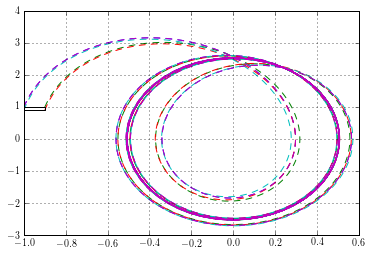

In [304]:
t, x_t = solve_forced_sdof_n(x0 = x0, v0 = v0, mu = 1, max_time=20)
plt.plot(x_t[:,0,0],x_t[:,0,1],'k-')
plt.plot(x_t[:,len(t)-1,0],x_t[:,len(t)-1,1],'k-')

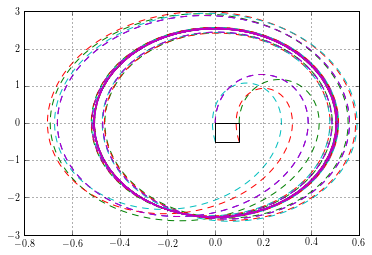

In [307]:
x0 = np.array([[0, 0.1 , 0.1, 0, 0]]).T 
v0 = np.array([[0, 0, -0.5, -0.5, 0]]).T
t, x_t = solve_forced_sdof_n(x0 = x0, v0 = v0, mu = 1, max_time=20)
plt.plot(x_t[:,0,0],x_t[:,0,1],'k-')
plt.plot(x_t[:,len(t)-1,0],x_t[:,len(t)-1,1],'k-')

Similar applies to maps. A map is dissipative if 
$$\left|\text{det} D_{\mathbf{x}_k}\mathbf{F}\right|<1$$
### Example 1.9
Henon map

$$\text{det} D_{\mathbf{x}_k}\mathbf{F} = 
\text{det} \begin{bmatrix}-2 \alpha x_k&1\\ \beta & 0\end{bmatrix} = -\beta$$
Hence if $|\beta|< 1$, the Henon map is dissipative for all $x_k$. The area is contracted by $|\beta|$ at each iteration. 

# Doodling Testing below

In [164]:
a=np.array(((1,2),(3,4)))
a

array([[1, 2],
       [3, 4]])

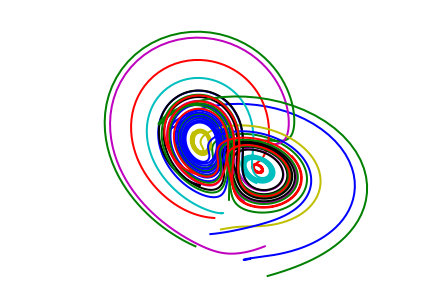

(array([ 0.        ,  0.004004  ,  0.00800801,  0.01201201,  0.01601602,
         0.02002002,  0.02402402,  0.02802803,  0.03203203,  0.03603604,
         0.04004004,  0.04404404,  0.04804805,  0.05205205,  0.05605606,
         0.06006006,  0.06406406,  0.06806807,  0.07207207,  0.07607608,
         0.08008008,  0.08408408,  0.08808809,  0.09209209,  0.0960961 ,
         0.1001001 ,  0.1041041 ,  0.10810811,  0.11211211,  0.11611612,
         0.12012012,  0.12412412,  0.12812813,  0.13213213,  0.13613614,
         0.14014014,  0.14414414,  0.14814815,  0.15215215,  0.15615616,
         0.16016016,  0.16416416,  0.16816817,  0.17217217,  0.17617618,
         0.18018018,  0.18418418,  0.18818819,  0.19219219,  0.1961962 ,
         0.2002002 ,  0.2042042 ,  0.20820821,  0.21221221,  0.21621622,
         0.22022022,  0.22422422,  0.22822823,  0.23223223,  0.23623624,
         0.24024024,  0.24424424,  0.24824825,  0.25225225,  0.25625626,
         0.26026026,  0.26426426,  0.26826827,  0.2

In [157]:
def solve_lorenz(N=10, angle=0.0, max_time=4.0, sigma=10.0, beta=8./3, rho=28.0):

    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1], projection='3d')
    ax.axis('off')

    # prepare the axes limits
    ax.set_xlim((-25, 25))
    ax.set_ylim((-35, 35))
    ax.set_zlim((5, 55))
    
    def lorenz_deriv(x_y_z, t0, sigma=sigma, beta=beta, rho=rho):
        """Compute the time-derivative of a Lorenz system."""
        x, y, z = x_y_z
        return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

    # Choose random starting points, uniformly distributed from -15 to 15
    np.random.seed(1)
    x0 = -15 + 30 * np.random.random((N, 3))

    # Solve for the trajectories
    t = np.linspace(0, max_time, int(250*max_time))
    x_t = np.asarray([sp.integrate.odeint(lorenz_deriv, x0i, t)
                      for x0i in x0])
    
    # choose a different color for each trajectory
    colors = plt.cm.jet(np.linspace(0, 1, N))

    for i in range(N):
        x, y, z = x_t[i,:,:].T
        lines = ax.plot(x, y, z, '-', c=colors[i])
        plt.setp(lines, linewidth=2)

    ax.view_init(30, angle)
    plt.show()

    return t, x_t
solve_lorenz()

## Doodling/testing below

In [17]:
def square(num=1):
    print("{} squared is {}".format(num, num*num))
interact(square, num=5)


5 squared is 25


None

In [ ]:
@interact
def square(num=2):
    print("{} squared is {}".format(num, num*num))


In [14]:
matlab = '/Applications/MATLAB_R2015a.app/bin/matlab'
%load_ext pymatbridge

Starting MATLAB on ZMQ socket ipc:///tmp/pymatbridge-faa2f5f7-4be0-427c-9a9f-b03aabca9f51
Send 'exit' command to kill the server
............MATLAB started and connected!


/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/IPython/nbformat.py:13: ShimWarning: The `IPython.nbformat` package has been deprecated. You should import from nbformat instead.
  "You should import from nbformat instead.", ShimWarning)


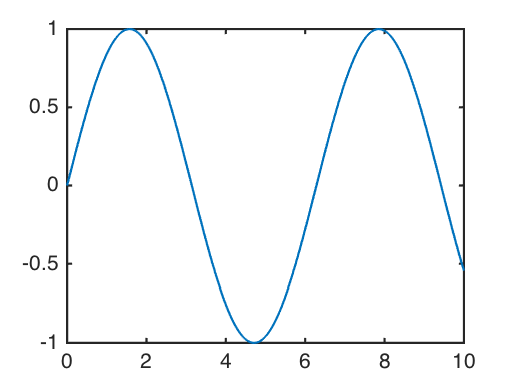

In [16]:
%%matlab
i=0:.01:10;
plot(i,sin(i))